# Εργασία 1. Επιβλεπόμενη Μάθηση - UCI dataset
Neural Networks - Team 22\
\
Alexandros Tsafos el18211\
Christina Kostaki el18136\
Sofia Vouzika el18843
  

Στο πρώτο μέρος της 1ης εργασίας, ασχολούμαστε με dataset από το UCI Machine Learning Repository, διαμορφώνουμε κατάλληλα τα δεδομένα ώστε να μας είναι εύχρηστα, εφαρμόζουμε διάφορους ταξινομητές και αξιολογούμε βάσει μετριτικών την απόδοσή τους. Αρχικά τους αξιολογούμε με τις default τιμές τους, ενώ στη συνέχεια πραγματοποιούμε βελτιστοποιήσεις και κρίνουμε εκ νέου τη συμπεριφορά τους. Τέλος, σχολιάζουμε τα παραπάνω αποτελέσματα.


Αρχικά κάνουμε upgrade στις βιβλοθήκες που θα χρειαστούμε.

In [ ]:
!pip install --upgrade pip
!pip install scikit-learn --upgrade 
!pip install numpy --upgrade 
!pip install --upgrade matplotlib 
!pip install --upgrade pandas
import pandas as pd
import numpy as np

![UCI ML Logo](http://archive.ics.uci.edu/ml/assets/logo.gif "UCI Machine Learning Repository")

To [UCI ML Repository](http://archive.ics.uci.edu/ml/index.php) είναι το διασημότερο αποθετήριο datasets για Machine Learning. Το dataset με το οποίο θα δουλέψουμε είναι το [Dermatology Database](http://archive.ics.uci.edu/ml/datasets/Dermatology). Το dataset περιλαμβάνει διάφορες πληροφορίες σχετικά με δερματολογικές παθήσεις, συγκεκριμένα ESD (Erythemato-Squamous Diseases) καθώς και ετικέτες για κάθε δείγμα (sample), αν αυτό αντιστοιχεί σε μία από τις έξι κατηγορίες ESD. Το σύνολο δεδομένων έχει 365 δείγματα και περιλαμβάνει 34 χαρακτηριστικά (attributes) για κάθε δείγμα - όλα διατεταγμένα -, είτε κλινικά  π.χ. βαθμός εξανθήματος, φαγούρα, οικογενειακό ιστορικό είτε ιστοπαθολογικά όπως άκράτεια μελανίνης, εξωκυττάρωση, παρουσία ηωσινόφιλων. Θα χρησιμοποιήσουμε αυτό το dataset και τα χαρακτηριστικά για να προβλέψουμε σε ποια κατηγορία δερματολογικής πάθησης υπάγεται κάθε δείγμα.


Πήραμε τα δεδομένα από το Data Set Description και προσθέσαμε ως header τις ονομασίες των features για καλύτερη δόμηση του csv αρχείου και κλήση των δεδομένων. Τις  μη καταχωρημένες τιμές (συγκεκριμένα, στο feature 'Age'), τις αντικαταστήσαμε με τον μέσο όρο των υπολοίπων τιμών, με τις συναρτήσεις conv - όπου μετατρέπουμε όλες τις απουσιάζουσες τιμές σε -1 - και get_average - όπου, από τις υπόλοιπες τιμές υπολογίζουμε και αντικαθιστούμε τον μέσο όρο ηλικίας. Συνολικά, το ποσοστό των απουσιάζουσων τιμών αποτελούσε περίπου το 2.2% του συνολικού.


In [94]:
import pandas as pd
import numpy as np

def conv(val):
    try:
        return int(val)
    except:
        return np.nan

# Read CSV and replace the uknown Age values with the average Age.
dataset = pd.read_csv("dermatology.data", low_memory=False, converters={'Age': conv})
print(dataset.shape)

print(dataset.isnull().sum().sort_values(ascending=False))

(366, 35)
Age                                         8
erythema                                    0
vacuolisation and damage of basal layer     0
elongation of the rete ridges               0
thinning of the suprapapillary epidermis    0
spongiform pustule                          0
munro microabcess                           0
focal hypergranulosis                       0
disappearance of the granular layer         0
spongiosis                                  0
parakeratosis                               0
saw-tooth appearance of retes               0
follicular horn plug                        0
perifollicular parakeratosis                0
inflammatory monoluclear inflitrate         0
band-like infiltrate                        0
clubbing of the rete ridges                 0
hyperkeratosis                              0
scaling                                     0
knee and elbow involvement                  0
definite borders                            0
itching                 

In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner phenomenon                        366 non-null    int64  
 5   polygonal papules                         366 non-null    int64  
 6   follicular papules                        366 non-null    int64  
 7   oral mucosal involvement                  366 non-null    int64  
 8   knee and elbow involvement                366 non-null    int64  
 9   scalp involvement                         366 non-null    int64  
 10  family history                        

 To dataset έχει 8 ΝaN τιμές. Αυτές πρέπει να αλλάξουν για να μπορέσουμε να συνεχίσουμε.
 Επιλέγουμε να τις κάνουμε drop, καθώς αποτελούν αμελητέο μέρος των δεδομένων.

In [96]:
dataset.dropna(inplace=True)

print("The NaN values now are: " + str(dataset.isnull().sum().sum()))
print(dataset.shape)

The NaN values now are: 0
(358, 35)


Τα σημαντικά κλειδιά του λεξικού που διμηιουργήσαμε παραπάνω είναι οι ονομασίες των κατηγοριών εξόδου (target_names), οι κατηγορίες (ή κλάσεις ή ετικέτες) εξόδου (target), τα ονόματα των χαρακτηριστικών (feature_names) και τέλος τα ίδια τα χαρακτηριστικά (data). Στην πράξη χρειαζόμαστε μόνο τα χαρακτηριστικά (features) και τις ετικέτες τους (labels). Οι ονομασίες μας πληροφορούν για τη φυσική ερμηνεία των χαρακτηριστικών.

Δημιουργούμε νέες μεταβλητές για κάθε σημαντικό σύνολο πληροφορίας του dataset:

In [97]:
# Extract the values
label_names = ['psoriasis','seboreic dermatitis','lichen planus','pityriasis rosea','cronic dermatitis','pityriasis rubra pilaris']
labels = dataset["Label"].values
features = dataset.iloc[:,:34].values
feature_names = dataset.columns[:-1]


Στη συνέχεια τυπώνουμε τις έξι κλάσεις - ετικέτες:

In [98]:
# Our target names - possible diseases
print(label_names)

['psoriasis', 'seboreic dermatitis', 'lichen planus', 'pityriasis rosea', 'cronic dermatitis', 'pityriasis rubra pilaris']


In [99]:
# Classes of all dermatology labels where 1:psoriasis incremented to 6:pityriasis rubra pilaris
print(labels)
# Labels are an one dimensional array
print(labels.shape)

unique, counts = np.unique(labels, return_counts=True)
print("frequencies:", counts)

[2 1 3 1 3 2 5 3 4 4 1 2 2 1 3 4 2 1 3 5 6 2 5 3 5 1 6 5 2 3 1 2 1 2 3 1 2
 4 1 2 5 3 4 6 2 3 3 4 1 1 5 1 2 3 4 2 6 1 5 1 2 3 1 4 5 1 2 6 3 5 4 2 2 1
 3 5 1 2 2 2 5 1 1 3 1 4 2 2 5 1 3 4 2 5 1 6 2 5 1 2 2 1 4 1 3 1 1 3 5 3 3
 5 2 3 4 1 2 5 6 1 1 2 6 3 5 4 1 1 3 5 5 1 4 2 3 1 2 1 1 3 3 3 2 5 4 2 2 1
 1 1 5 3 2 3 2 2 4 2 3 6 2 1 1 3 4 3 3 1 1 1 3 1 1 2 3 3 1 1 1 1 6 2 2 2 2
 1 3 3 3 1 1 2 3 2 2 2 5 5 5 5 5 1 1 1 1 1 1 1 3 3 3 3 3 3 4 4 4 4 5 5 5 5
 5 5 5 2 2 2 2 1 1 1 1 1 1 6 6 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 4 4 4 4 4 4 6
 6 6 4 4 4 1 1 1 1 1 2 2 4 4 4 1 1 2 2 2 3 3 3 3 1 1 1 1 5 5 5 5 5 3 3 3 4
 1 1 4 4 4 1 1 1 3 3 3 3 3 1 1 1 1 4 4 1 1 4 3 3 4 1 1 4 4 5 5 1 1 5 5 3 1
 5 5 6 6 4 4 6 6 6 1 1 1 5 5 1 1 1 1 2 2 4 4 3 3 1]
(358,)
frequencies: [111  60  71  48  48  20]


Τυπώνουμε τη συχνότητα εμφάνισης των έξι κλάσεων και παρατηρούμε ότι πρόκειται για μη ισορροπημένο dataset, καθώς η πρώτη κλάση εμφανίζεται συχνότερα (>1.5 φορά) από κάθε άλλη. Συγκεκριμένα, 30.6%, 16.7%, 19.7%, 13.4%, 14.3%, και 5.5% είναι τα ποσοστά των έξι κλάσεων, αντιστοιχίζοντας τες με τη σειρά εμφάνισής τους παραπάνω.

In [100]:
# Names of the features
print(feature_names)

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age'],
      dtype='object')


In [101]:
#dictionary's dimensions
print(features.shape)


(358, 34)


### Train and Test split

Για την αξιολόγηση των ταξινομητών χρειάζονται δεδομένα που δεν έχουν δει προηγουμένως, γιαυτό και αρχικά, πριν φτιαχτεί το μοντέλο κάθε ταξινομητή, χωρίζουμε τα δεδομένα μας τυχαία σε ένα σύνολο εκπαίδευσης (train set) και ένα σύνολο ελέγχου (test set), με αναλογία 70-30 μέσω της train_test_split.

Χρησιμοποιούμε το train set για να εκπαιδεύουμε και να βελτιώνουμε το μοντέλο του ταξινομητή κατά την ανάπτυξή του και το test set για να αξιολογούμε στατιστικά την απόδοση του. 

In [102]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)

In [103]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
import time
import warnings
warnings.filterwarnings('ignore')

uci_accuracy = {}
uci_f1 = {}
uci_fit = {}
uci_pred = {}

def dummy_metrics(solver, const = None):

    name = 'dummy_' + solver
    model = DummyClassifier(strategy=solver, constant=const)
    start = time.time()
    model.fit(train, train_labels)
    fit_time  = time.time() - start
    start = time.time()
    preds = model.predict(test)
    pred_time  = time.time() - start

    uci_pred[name] = pred_time
    uci_fit[name] = fit_time
    uci_accuracy[name] = accuracy_score(test_labels, preds)
    uci_f1[name] = f1_score(test_labels, preds, average='macro')

dummy_metrics('uniform')
dummy_metrics('most_frequent')
dummy_metrics('stratified')
dummy_metrics('constant', 1)
dummy_metrics('constant', 6)

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import time
import warnings
warnings.filterwarnings('ignore')

def knn_metrics(neighbors):

    name = 'knn_' + str(neighbors)
    model = KNeighborsClassifier(n_neighbors=neighbors)
    start = time.time()
    model.fit(train, train_labels)
    fit_time  = time.time() - start
    start = time.time()
    preds = model.predict(test)
    pred_time  = time.time() - start

    uci_pred[name] = pred_time
    uci_fit[name] = fit_time
    uci_accuracy[name] = accuracy_score(test_labels, preds)
    uci_f1[name] = f1_score(test_labels, preds, average='macro')

knn_metrics(5)
knn_metrics(10)
knn_metrics(15)

Στο παρακάτω κομμάτι κώδικα, βλέπουμε αρχικά τη συμπεριφορά των ταξινομητών χωρίς καμία βελτιστοποίηση (out-of-the-box metrics). Με τη μέθοδο fit εκπαιδεύουμε τον ταξινομητή και με τη μέθοδο predict παράγουμε προβλέψεις βάσει των δεδομένων του test set. Καλούμε επίσης τις συναρτήσεις των μετρικών και τις επιστρέφουμε κατά φθίνουσα σειρά, για μια πρώτη κατάταξη των ταξινομητών.

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


def out_of_the_box_metrics(model, classifier_name):
    
    start = time.time()
    model.fit(train, train_labels)
    fit_time  = time.time() - start
    start = time.time()
    preds = model.predict(test)
    pred_time  = time.time() - start

    uci_pred[classifier_name] = pred_time
    uci_fit[classifier_name] = fit_time
    uci_accuracy[classifier_name] = accuracy_score(test_labels, preds)
    uci_f1[classifier_name] = f1_score(test_labels, preds, average='macro')


gnb = GaussianNB()
logisticRegr = LogisticRegression(solver='saga')

out_of_the_box_metrics(gnb, 'Naive Bayes')
out_of_the_box_metrics(logisticRegr, 'Logistic Regression')



In [106]:
from IPython.display import Markdown

merged_metrics = [(k, uci_fit[k], uci_pred[k], uci_accuracy[k], uci_f1[k]) for k in sorted(uci_accuracy, key=uci_accuracy.get, reverse=True)]

df = pd.DataFrame(merged_metrics, columns=['Classifier', 'Fit Time(s)', 'Test Time(s)','Accuracy','F1-macro'])
Markdown(df.to_markdown())

|    | Classifier          |   Fit Time(s) |   Test Time(s) |   Accuracy |   F1-macro |
|---:|:--------------------|--------------:|---------------:|-----------:|-----------:|
|  0 | Logistic Regression |   0.0198159   |    0.000203133 |  0.962963  |  0.956349  |
|  1 | Naive Bayes         |   0.00267982  |    0.00116825  |  0.851852  |  0.831895  |
|  2 | knn_5               |   0.00138283  |    0.175308    |  0.759259  |  0.711245  |
|  3 | knn_15              |   0.000161171 |    0.175496    |  0.75      |  0.682556  |
|  4 | knn_10              |   0.000118971 |    0.186024    |  0.731481  |  0.641805  |
|  5 | dummy_most_frequent |   0.000698805 |    0.00022912  |  0.324074  |  0.0815851 |
|  6 | dummy_uniform       |   0.000191927 |    0.000123739 |  0.185185  |  0.174107  |
|  7 | dummy_stratified    |   0.000212908 |    0.00161505  |  0.166667  |  0.168114  |
|  8 | dummy_constant      |   0.000254869 |    0.00014782  |  0.0462963 |  0.0147493 |

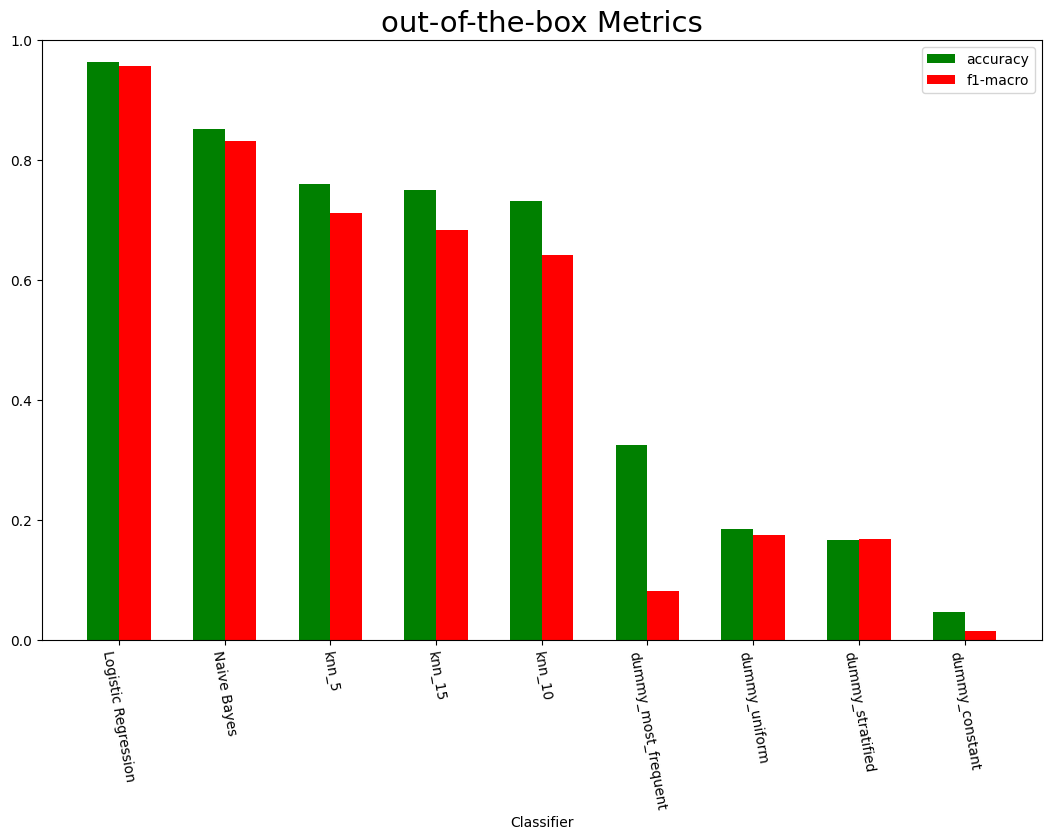

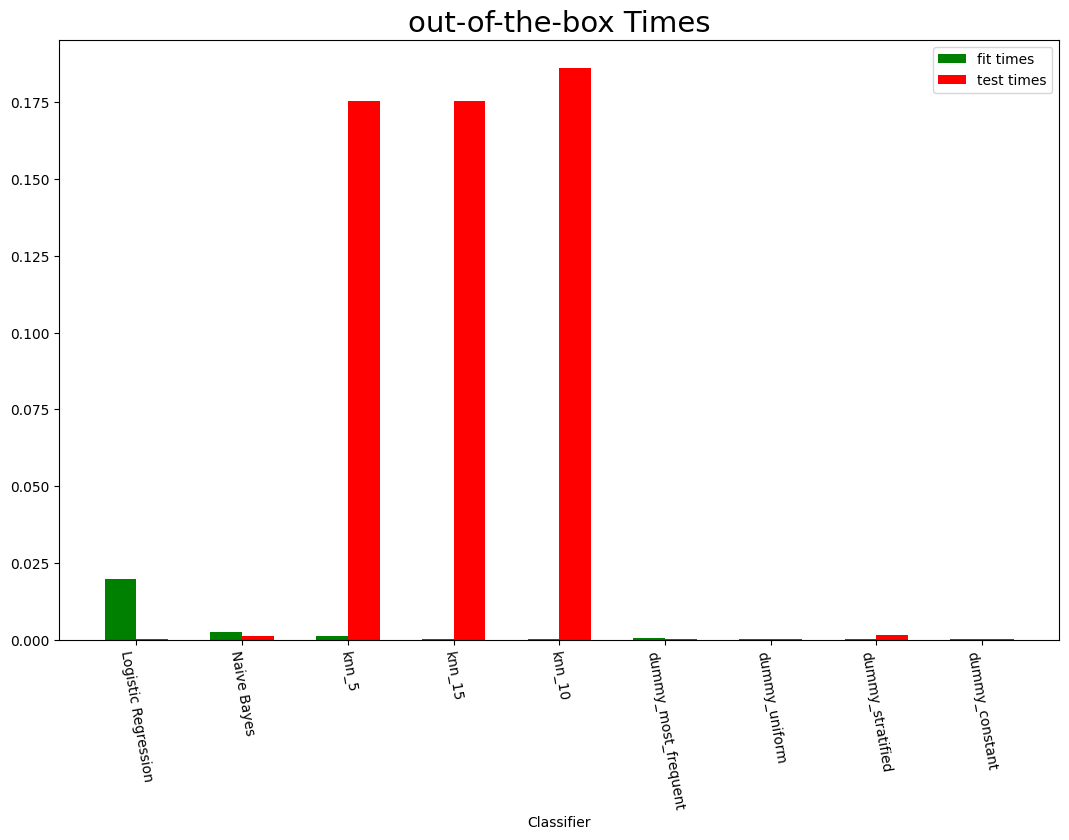

In [107]:
import matplotlib.pyplot as plt

keys, fit_times, test_times, accuracy, f1_macro = zip(*merged_metrics)


fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(len(keys)) - 0.15, accuracy, color = 'g', width = 0.3)
ax.bar(np.arange(len(keys)) + 0.15, f1_macro, color = 'r', width = 0.3)
plt.xlabel('Classifier')
ax.legend(labels=['accuracy', 'f1-macro'])
ax.set_title('out-of-the-box Metrics',fontsize = 21)
plt.xticks(np.arange(len(keys)), keys)
plt.xticks(rotation = 280)

plt.ylim(0, 1)

plt.show()



fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(len(keys)) - 0.15, fit_times, color = 'g', width = 0.3)
ax.bar(np.arange(len(keys)) + 0.15, test_times, color = 'r', width = 0.3)
plt.xlabel('Classifier')
ax.legend(labels=['fit times', 'test times'])
ax.set_title('out-of-the-box Times',fontsize = 21)
plt.xticks(np.arange(len(keys)), keys)
plt.xticks(rotation = 280)


plt.show()

### Σχολιασμός

Παρατηρούμε πολύ καλή επίδοση στον LR και ικανοποιητικές επιδόσεις - για out-of-the-box δεδομένα - στους non-dummy ταξινομητές.

# Optimisation

Θα βελτιστοποιήσουμε τώρα όλους τους ταξινομητές.

Έχει γίνει ήδη ένα μικρό μέρος προεπεξεργασίας των δεδομένων, το ελάχιστο που θα μπορούσε για να μετρήσουμε μία out-of-the-box μέτρηση αποδοτικότητας.

Θα χρησιμοποιήσουμε έτοιμες συναρτήσεις από τα sklearn και Optuna.

## Pipeline

Αντί να εφαρμόζουμε απευθείας όλες τις τεχνικές βελτιστοποίησης, εκπαίδευσης και πρόβλεψης, μπορούμε να ορίσουμε ένα pipeline. Πιο συγκεκριμένα, στο Pipeline μας θα εκτελέσουμε:
- Variance Threshold για μηδενικές αποκλίσεις
- Standard Scaling
- Oversampling (τo dataset είναι πολύ μικρό για να μας επηρεάσει αρνητικά)
- PCA
 Χρησιμοποιούμε την συνάρτηση VarianceThreshold για να αφαιρέσουμε τα χαρακτηριστικά στα οποία η διακύμανση είναι 0, έχουν δηλαδή σταθερή τιμή για όλα τα δείγματα και για αυτό δεν μπορούν να προσφέρουν στην διαχωριστική ικανότητα του ταξινομητή.

 Διαιρώντας με το standard score του κάθε χαρακτηριστικού, κάνει το χαρακτηριστικό να έχει μέση τιμή μηδέν και διακύμανση μονάδα. H μετατροπή σε standard score είναι απαραίτητη σε πολλούς ταξινομητές για να συμπεριφερθούν σωστά και ειναι και πιο ανθεκτική.
 
 Eφαρμόσουμε oversampling, θεωρώντας ότι όσο πιο ισορροπημένο είναι το dataset, τόσο καλύτερα θα είναι τα αποτελέσματα.
 
 Με την ανάλυση σε κύριες συνιστώσες (PCA), αναλύουμε τα δεδομένα σε κύριες συνιστώσες και δουλέυουμε με τελείως νέες, γραμμικά ασυσχέτιστες μεταβλητές μικρότερης διαστατικότητας.

Επίσης, θα εκτελέσουμε Grid Search, για την εύρεση των καλύτερων παραμέτρων για τις διαδικασίες

In [116]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
model = DummyClassifier()
pca = PCA()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),('dummy', model)])
n_components = list(range(35))
strategies = ['uniform', 'most_frequent', 'stratified', 'constant']
const = [1,6]
dummy_estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, dummy__strategy = strategies, dummy__constant = const), cv=10, scoring='f1_macro', refit='accuracy', n_jobs=-1)

start = time.time()
dummy_estimator.fit(train, train_labels)
fit_time  = time.time() - start
start = time.time()
preds = dummy_estimator.predict(test)
pred_time  = time.time() - start

uci_pred['opt_dummy'] = pred_time
uci_fit['opt_dummy'] = fit_time
uci_accuracy['opt_dummy'] = accuracy_score(test_labels, preds)
uci_f1['opt_dummy'] = f1_score(test_labels, preds, average='macro')



In [117]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
model = KNeighborsClassifier()
pca = PCA()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),('knn', model)])
n_components = list(range(35))
k = list(range(30))
knn_estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, knn__n_neighbors=k), cv=10, scoring='f1_macro', refit='accuracy', n_jobs=-1)

start = time.time()
knn_estimator.fit(train, train_labels)
fit_time  = time.time() - start
start = time.time()
preds = knn_estimator.predict(test)
pred_time  = time.time() - start

uci_pred['opt_knn'] = pred_time
uci_fit['opt_knn'] = fit_time
uci_accuracy['opt_knn'] = accuracy_score(test_labels, preds)
uci_f1['opt_knn'] = f1_score(test_labels, preds, average='macro')

In [118]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
model = GaussianNB()
pca = PCA()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),('gnb', model)])
n_components = list(range(35))
gnb_estimator = GridSearchCV(pipe, dict(pca__n_components=n_components), cv=10, scoring='f1_macro', refit='accuracy', n_jobs=-1)

start = time.time()
gnb_estimator.fit(train, train_labels)
fit_time  = time.time() - start
start = time.time()
preds = gnb_estimator.predict(test)
pred_time  = time.time() - start

uci_pred['opt_gnb'] = pred_time
uci_fit['opt_gnb'] = fit_time
uci_accuracy['opt_gnb'] = accuracy_score(test_labels, preds)
uci_f1['opt_gnb'] = f1_score(test_labels, preds, average='macro')

In [119]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
model = LogisticRegression()
pca = PCA()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),('lr', model)])
n_components = list(range(35))
lr_estimator = GridSearchCV(pipe, dict(pca__n_components=n_components), cv=10, scoring='f1_macro', refit='accuracy', n_jobs=-1)

start = time.time()
lr_estimator.fit(train, train_labels)
fit_time  = time.time() - start
start = time.time()
preds = lr_estimator.predict(test)
pred_time  = time.time() - start

uci_pred['opt_LR'] = pred_time
uci_fit['opt_LR'] = fit_time
uci_accuracy['opt_LR'] = accuracy_score(test_labels, preds)
uci_f1['opt_LR'] = f1_score(test_labels, preds, average='macro')


# Τελικά αποτελέσματα

In [120]:
from IPython.display import Markdown

merged_metrics = [(k, uci_fit[k], uci_pred[k], uci_accuracy[k], uci_f1[k]) for k in sorted(uci_accuracy, key=uci_accuracy.get, reverse=True)]

df = pd.DataFrame(merged_metrics, columns=['Classifier', 'Fit Time(s)', 'Test Time(s)','Accuracy','F1-macro'])
Markdown(df.to_markdown())

|    | Classifier          |   Fit Time(s) |   Test Time(s) |   Accuracy |   F1-macro |
|---:|:--------------------|--------------:|---------------:|-----------:|-----------:|
|  0 | Logistic Regression |   0.0198159   |    0.000203133 |  0.962963  |  0.956349  |
|  1 | opt_LR              |   1.02639     |    0.000245094 |  0.962963  |  0.956349  |
|  2 | opt_knn             |  11.9736      |    0.295057    |  0.953704  |  0.952058  |
|  3 | opt_gnb             |   0.4875      |    0.00035882  |  0.935185  |  0.922144  |
|  4 | Naive Bayes         |   0.00267982  |    0.00116825  |  0.851852  |  0.831895  |
|  5 | knn_5               |   0.00138283  |    0.175308    |  0.759259  |  0.711245  |
|  6 | knn_15              |   0.000161171 |    0.175496    |  0.75      |  0.682556  |
|  7 | knn_10              |   0.000118971 |    0.186024    |  0.731481  |  0.641805  |
|  8 | dummy_most_frequent |   0.000698805 |    0.00022912  |  0.324074  |  0.0815851 |
|  9 | opt_dummy           |   6.85339     |    0.000344992 |  0.212963  |  0.195059  |
| 10 | dummy_uniform       |   0.000191927 |    0.000123739 |  0.185185  |  0.174107  |
| 11 | dummy_stratified    |   0.000212908 |    0.00161505  |  0.166667  |  0.168114  |
| 12 | dummy_constant      |   0.000254869 |    0.00014782  |  0.0462963 |  0.0147493 |

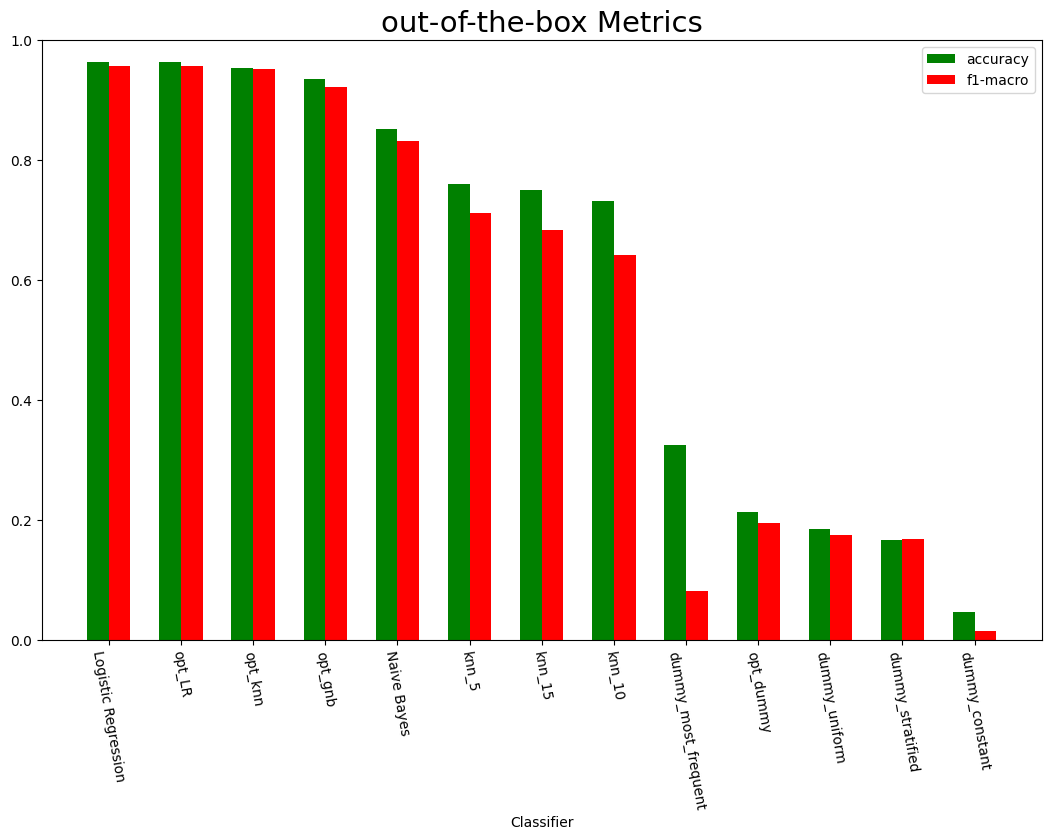

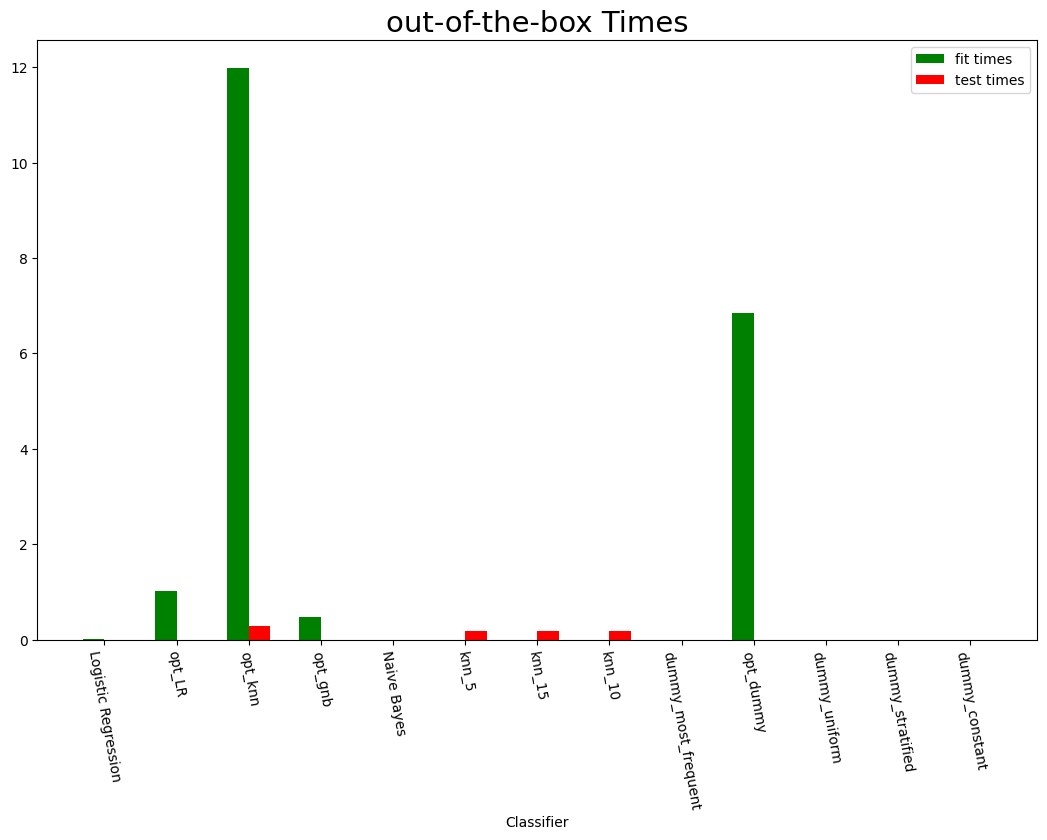

In [121]:
import matplotlib.pyplot as plt

keys, fit_times, test_times, accuracy, f1_macro = zip(*merged_metrics)


fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(len(keys)) - 0.15, accuracy, color = 'g', width = 0.3)
ax.bar(np.arange(len(keys)) + 0.15, f1_macro, color = 'r', width = 0.3)
plt.xlabel('Classifier')
ax.legend(labels=['accuracy', 'f1-macro'])
ax.set_title('out-of-the-box Metrics',fontsize = 21)
plt.xticks(np.arange(len(keys)), keys)
plt.xticks(rotation = 280)

plt.ylim(0, 1)

plt.show()



fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(len(keys)) - 0.15, fit_times, color = 'g', width = 0.3)
ax.bar(np.arange(len(keys)) + 0.15, test_times, color = 'r', width = 0.3)
plt.xlabel('Classifier')
ax.legend(labels=['fit times', 'test times'])
ax.set_title('out-of-the-box Times',fontsize = 21)
plt.xticks(np.arange(len(keys)), keys)
plt.xticks(rotation = 280)


plt.show()

#Σχολιασμός

Παρατηρούμε πως ο ταξινομητής LR έχει και πάλι την μέγιστη απόδοση συγκριτικά με τους υπόλοιπους βελτιστοποιημένους ταξινομητές. 
Η ακρίβεια και το F1 παρέμειναν ίδια συγκριτικά με την out-of-the-box εκδοχή του ενώ ο χρόνος εκπαίδευσης έχει αυξηθεί αρκετά. 
Επιπλέον, φαίνεται θετική μεταβολή της επίδοσης των άλλων δύο ταξινομητών (GNB και KNN), κυρίως του knn σε σχέση με πριν. Πιο συγκεκριμένα για τον KNN υπάρχει βελτίωση της ορθότητας και του f1 κατά 20%, αυξάνεται όμως αρκετά και ο χρόνος εκπαίδευσης. Ανάλογες μεταβολές στην επίδπση παρατηρούνται και για τον GNB, με μικρότερη επιρροή στους χρόνους. 

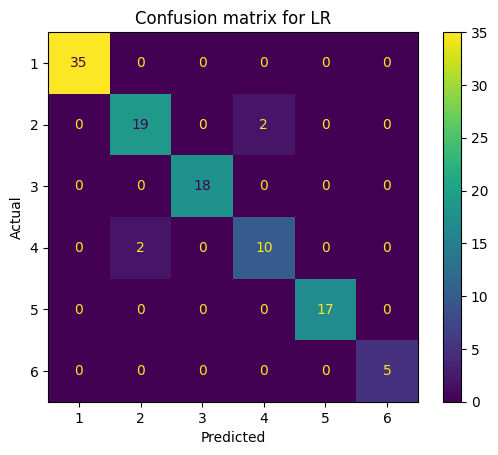

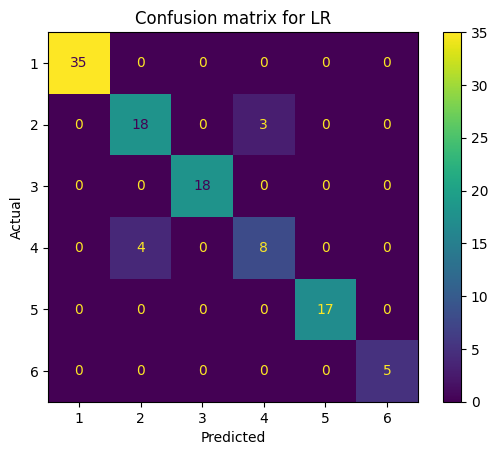

In [125]:
from sklearn.metrics import plot_confusion_matrix
import time
import warnings
warnings.filterwarnings('ignore')

plot_confusion_matrix(lr_estimator, test, test_labels)  
plt.title('Confusion matrix for LR')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

plot_confusion_matrix(gnb_estimator, test, test_labels)  
plt.title('Confusion matrix for GNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

#Παρατηρήσεις

Όπως αναμενόταν ο πίνακας σύγχυσης για τον LR είναι καλύτερος απο του GNB, καθώς φαίνεται να μην επιτυγχάνει την πρόβλεψη του για 4 μόνο περιπτώσεις, ενώ ο GNB για 7. Αξιοσημείωτο είναι το γεγονός πως υπάρχει και στις δύο περιπτώσεις σύγχυση όσον αφορά την ταξινόμηση μεταξύ της 2ης και της 4η κλάσης. 

#Τελικό συμπέρασμα

Ο προτιμόμενος ταξινομητής φαίνεται να είναι ο LR σε κάθε περίπτωση καθώς έχει την μέγιστη απόδοση, ορθότητα και f1-score σε συνδυασμό με μικρούς χρόνους εκπαίδευσης και πρόβλεψης. 